In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

ModuleNotFoundError: No module named 'tensorflow'

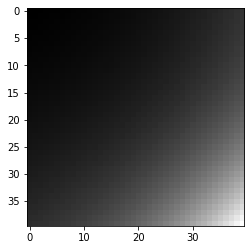

In [27]:
#the data to calculate the polynomial coeff.
def create_polynomials(x,y,Nmax):
    c=np.random.uniform(0,Nmax,(Nmax,Nmax))
    p=np.polynomial.polynomial.polyval2d(x,y,c)

    #normalization
    p-=np.min(p)
    p/=np.max(p)

    return p

#here we create one image and take a look at it
x=np.linspace(0,1,40)
y=np.linspace(0,1,40)
x,y=np.meshgrid(x,y)
res=create_polynomials(x,y,5)
plt.imshow(res,cmap='gray')

In [28]:
print(np.max(res))
#construct the dataset
def create_dataset(x,y,N_max,N):
    dataset=[]

    for _ in range(N):
        dataset.append(create_polynomials(x,y,N_max))

    return np.array(dataset)

1.0


In [29]:
poly5_img=create_dataset(x,y,5,200)

In [30]:
encoding_dim = 10  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(1600,))
encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(1600,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)

encoder=Model(input_img,encoded)

encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))


autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1600)]            0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
_________________________________________________________________
dense_1 (Dense)              (None, 1600)              17600     
Total params: 33,610
Trainable params: 33,610
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1600)]            0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
__________________________________________